# Investigating Numpy.random

## About the package

<img src="http://www.numpy.org/_static/numpy_logo.png" width = '400'>

Numpy is a package that provides a lot of different functions for generating different types of random numbers. 

In [24]:
import numpy as np #For generating random numbers
import matplotlib.pyplot as plt #For plotting distributions
import seaborn as sns #Mainly used for distplot
import pandas as pd
%matplotlib inline 

## Simple Random Data 

### The Rand() function returns random numbers in the range (0, 1) and form a uniform distrubution.

This distribution is sometimes referred to as the regtangular distribution, and results when every value in the range has equal probability of been chosen. np.random.random performs the same function. I can use this function to create a array of random floats. 

In [3]:
# Generating two random numbers using rand()
y = np.random.rand(2)
print(y)

[0.2799555  0.63952467]


Alternatively, I can call more than one array of a specific size containing random numbers from the standard uniform distribution. 

In [35]:
# Generating two 3x3 arrays 
y = np.random.rand(2, 3, 3)
print(y)

[[[0.43348006 0.09702942 0.2571166 ]
  [0.80477771 0.40935759 0.12998516]
  [0.66188174 0.1294099  0.62192808]]

 [[0.32053507 0.28306274 0.55710741]
  [0.36481098 0.97265234 0.24131546]
  [0.22638498 0.65643551 0.07933569]]]


In small sets, it is difficult to see that the data is uniformly distributed. In fact in a small set my data may not resemble the uniform distribution, at all. However, if I was to randomly select 10,000 numbers and plot this data in a histogram it would be recognizably a regtanular distribution. 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


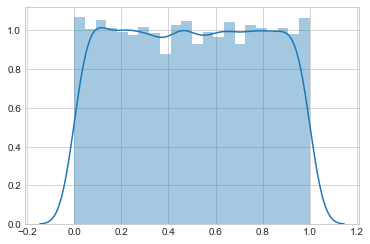

In [36]:
# Generating 10,000 random numbers to look at dist
y = np.random.rand(10000)
sns.set_style('whitegrid')
sns.distplot(y);

As you can see from the histogram of 100,000 random generated samples, this function returns a value between zero and one, and the distribution is generally uniform in shape. 

**Note: Negative dimensions are not allowed.** So np.random.rand(-10) would give an error, as it's impossible to list a negative number of samples. 




### The Randn() function, gives you a random number from the standard normal distribution

The standard normal distribution has mean 0 and standard deviation 1. This function can be used to generated random numbers and arrays, but unlike the rand() function, you would find almost all of your data between - 3 and +3. 

np.random.normal(0, 1) also returns one random number generated from the standard normal distribution.

Let's use this function to randomly generate 1000 numbers and see what normally distributed data looks like. 

In [37]:
#Generating 1000 random numbers
x = np.random.randn(1000)

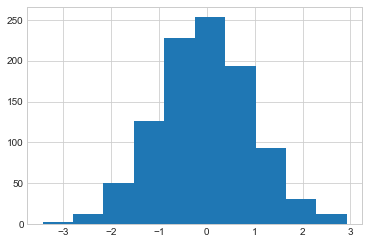

In [38]:
#Plotting the distribution of x in a histogram
plt.hist(x)
plt.show()

As expected, all of my values are between -3 and 3, and most of my values are between - 2 and 2. This is due to the Empirical Rule, which we will encounter in more detail later in this notebook. 

The Normal Distribution is often referred to as the bell curve, and we can see that clearly when we look at it's distribution curve.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


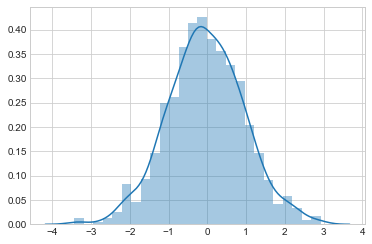

In [39]:
#Looking specifically at the distribution
plt.xticks(range(-5, 5, 1))
sns.set_style('whitegrid')
sns.distplot(x, kde=True);


### The Randint() function returns random integers from the Uniform Distribution.

When using Randint(), you set a low to high interval, from which randomly generated numbers are chosen. The low value is included in integers which may be returned but the high value in not. 

You also set size equal to the number of random integers you want from within that range. If you don't include size, then only one random integer is chosen.


Let's say I want to generate a random number between 2 and 100, excluding 100.

In [9]:
np.random.randint(2, 100)

34

Let's say I want to generate a negative number between - 100 and 0. In this example, randint() will never return 0, but may return - 100.

In [10]:
np.random.randint(-100, 0)

-94

Note, that this function will only work when the smallest number comes first. 

For example if you were to call np.rand.randint(100, 2), you would receive an error. 

Below a set of 2000 random integers are been generated. 

As I have only set one value, this function takes that number to be the high value, and generates numbers in the range 0 to high. Here my high is 30, so my generated set, contains 2000 numbers between 0 and 29 inclusive.

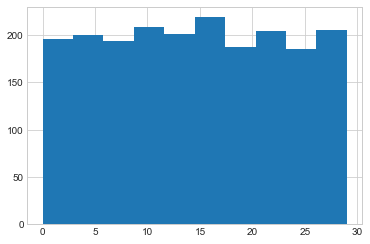

In [60]:
rand_int= np.random.randint(30, size = 2000)
sns.set_style('whitegrid')
plt.xticks(range(0, 31, 5))
plt.yticks(range(0, 251, 50))
plt.hist(rand_int)
plt.show()

### Generating random variables in an interval

There are several functions which you generate a random variable in the interbal 0 to 1, not including 1. 

They include. the random(), random_sample, sample() and ranf() functions. 

In [62]:
np.random.random()

0.019803915079854906

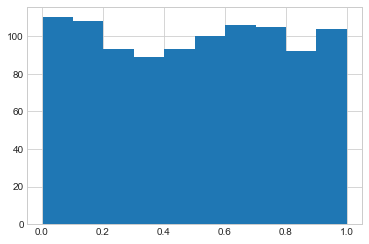

In [76]:
rand_f = np.random.ranf(1000)
plt.hist(rand_f)
plt.show()

We can take an array of random floats form 0 to 1, and then use that to generate values across a different interval. 


In [92]:
#Generating 10 random variables between 0 and 1
rand_f = np.random.random(10)

In [93]:
#Using that array, to print an array of variables from 0 to 10
10*(rand_f) 


array([5.29281693, 8.06781913, 4.33525492, 0.9572406 , 0.27471268,
       1.89704962, 2.18471161, 5.35703512, 0.60942084, 9.54762816])

In [94]:
#Using that array, to print an array of variables from - 10 to 0

10*(rand_f) - 10

array([-4.70718307, -1.93218087, -5.66474508, -9.0427594 , -9.72528732,
       -8.10295038, -7.81528839, -4.64296488, -9.39057916, -0.45237184])

In [95]:
#Using that array, to print an array of variables from -10 to 10
20*(rand_f) - 10 

array([ 0.58563387,  6.13563827, -1.32949016, -8.0855188 , -9.45057465,
       -6.20590076, -5.63057677,  0.71407024, -8.78115832,  9.09525632])

## Permutations

### Shuffle

In [12]:
x = np.arange(10)
print('My set: ', x)
print('Permutation: ',np.random.permutation(x))
np.random.shuffle(x)
print('Shuffle: ',x)


My set:  [0 1 2 3 4 5 6 7 8 9]
Permutation:  [2 5 6 4 0 8 3 1 7 9]
Shuffle:  [4 8 2 9 5 0 6 7 1 3]


In [13]:
a = np.around(np.random.rand(2, 3, 3)) 
print(a)

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 1. 0.]]

 [[0. 1. 1.]
  [1. 1. 1.]
  [0. 0. 0.]]]


In [14]:
p = np.random.permutation(a)
print(p)

[[[0. 1. 1.]
  [1. 1. 1.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 1. 0.]]]


In [15]:
np.random.shuffle(a)
print(a)

[[[0. 1. 1.]
  [1. 1. 1.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 1. 0.]]]


## Distributions

The distribution refers to the spread of data in a set. 

We have already encountered uniform and normally distributed data in the Simple Random Data package. 

### Uniform Distribution

Using np.random.uniform, returns a float number between a low and high range. You can set size equal to a number, to return that many randomly generated values. Similar to the randint() function, your size cannot be a negative dimension or you receive an error. 

But in contrast to the randint() function, it is not necessary to call the low value first. 

**For example** np.random.uniform(30, 1) and np.random.uniform(1, 30) will both return a value between 1 and 30. 

In [16]:
t = np.random.uniform(30, 1)
print(t)
t = np.random.uniform(1,30)
print(t)

1.0016024292706618
14.887541002166207


Let's begin by generating a random list of 40 numbers between 0 and 20. As the default low value is already zero, I only need to set my high value as 20, and specify size 40.

In [17]:
uni=np.random.uniform(20, size =40)
uni=np.around(uni, decimals=3)
print(uni)

[11.255 17.775 11.089 15.148  4.411 19.674 11.68  12.718 14.24  11.117
 13.942 19.967  6.866 17.582 13.411 19.059 15.345 14.074 10.926  5.6
  4.817 12.36   7.57   3.827 13.786 15.599 17.611  3.342  5.509  1.667
 11.451  8.864  1.896  5.997  2.075  1.526  7.834 13.419 13.003  2.058]


To generate 10 numbers between 300 and 600.

In [18]:
uni_sample=np.random.uniform(300, 600, size=10)
print(uni_sample)

[535.5266611  365.29602307 365.3232465  343.20345243 393.71686684
 439.84174723 374.04011681 516.07007876 384.16475487 591.11372354]


Plotting these values on a histogram, it's very likely that my distribution will not appear Uniform. This is due to the fact I have a very small set with only 10 samples. 

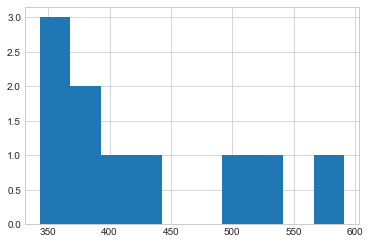

In [19]:
plt.hist(uni_sample)
sns.set_style('whitegrid')
plt.show()

So increasing the size of our set to 4000 values, instead of 10, should give us a better indication of the distribution of data that this function generates

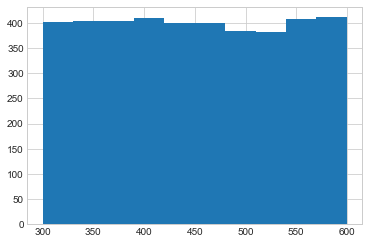

In [20]:
uni_sample=(np.random.uniform(300, 600, size= 4000))
sns.set_style('whitegrid')
plt.hist(uni_sample)
plt.show()

This function generates a float number between two values, and as I have set my values to be integers, there is an infinite number of possibile outcomes. The uniform function returns an even spread of values in the low to high interval, but the histogram above should not be taken to imply that even value between 300 and 600 is represented.

### Binomial Distribution

The Binomial Distribution in probability is the distribution of successes in  Binomial or Bernoulli trial. 

In a Bernoulli trial
* There are n independent trials
* Each trial has only two possible outcomes, ie Heads or Tails, Pass or Fail
* The probability of success is the same in each trial, and is denoted with the letter p

So the random.binomial() function takes the same parameters and can be used to simulate probability experiments.

### Flipping a Coin

If you flip a coin you can get either heads or tails, and each has a 50% chance of success. Let's say that I flip a coin 100 times, and I want to get heads. 

The binomial() function can simulate that experiment. 

In [21]:
heads = np.random.binomial(100, 0.5, 1)
print('I got %.0f heads, and %.0f tails in 100 trials' % (sum(heads), 100 - sum(heads)))

I got 52 heads, and 48 tails in 100 trials


Now what if I have 30 people all doing the same experiment. 

30 people each flip a coin 100 times and record their results, then we'd have 3000 flips of a coin. Our experimental probability should be even closer to our expected probability with that many trials. So let's run that simulation and see what we get.

In [22]:
new_heads = np.random.binomial(100, 0.5, 30)
print('We get %.0f heads, and %.0f tails in 3000 trials' % (sum(new_heads), 30*100 - sum(new_heads)))

We get 1478 heads, and 1522 tails in 3000 trials


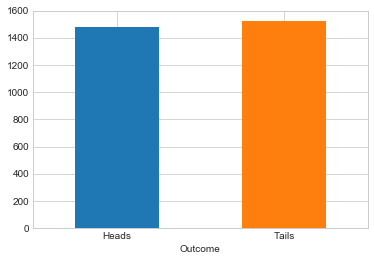

In [45]:
new_heads = (np.sum(new_heads))
new_tails = (3000 - new_heads)

df = pd.DataFrame({'Outcome':['Heads', 'Tails'], 'Freq':[new_heads, new_tails]})
ax = df.plot.bar(x = 'Outcome', y = 'Freq', legend = None, rot= 0)

Plotting the data from my 30 helpers, shows that there are no outliers with most getting between 40 and 60 heads when they flipped the coin

### Normal Distribution

A Normal Distribution is symmetrical about the mean of the set of data. 

To generate a set of values which follow the normal distribution, numpy.random provide two different functions; the standard_normal() and normal() functions.

Standard_normal() returns a number(s) which fit the standard normal distribution, where the mean is 0 and standard deviation is 1. As the mean and deviation are set by default, the only parameter to be entered is the number of values we want to generate. Here, I have generated a standard normal set with 1000 values

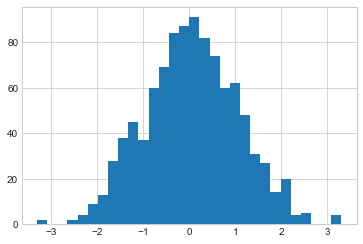

In [42]:
st_norm = np.random.standard_normal(1000)
plt.hist(st_norm, bins = 30)
sns.set_style('whitegrid')
plt.show()

To generate a random number that fits a different normal distribution, we need to know both the mean and the standard deviation of that set. Then we can use the np.random.normal() function

The Empirical Rule states that, in a normally distributed set, 68% of data is within one standard deviation of the mean, but 99.7% of data is found with in three standard deviations of the mean, as shown below.


<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Empirical_rule_histogram.svg/1106px-Empirical_rule_histogram.svg.png" width = '400'>

Therefore when we randomly generate number that fit a normal distrbution we can expect to get a distribution like the one above. 

If I was to randomly generate a number from a set, with mean 32 and standard deviation 5, I would most likely get a value between 22 and 42, as 95% of data is within two standard deviation of the mean.

In [43]:
# Generating a random number from the normal dist., with mean 32 and st.dev. 5
norm_x = np.around(np.random.normal(32, 5), decimals = 3)
norm_x


28.803

Below I have generated 1000 values, that model normally distributed data with mean 32, and standard deviation 5. 

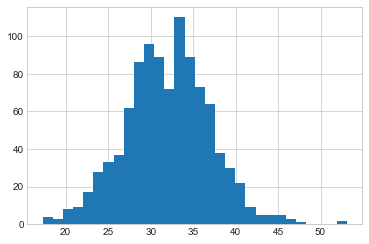

In [49]:
norm= np.random.normal(32, 5, 1000)
plt.hist(norm, bins=30)
sns.set_style('whitegrid')
plt.show()


### Four

### FIve

## Seeds and Pseudo-random Numbers

## References

* [NumPy v1.15 Manual, Random sampling (numpy.random)](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html)
* [Seaborn: Statistical Data Visualisation Tutorial](https://seaborn.pydata.org/tutorial.html)
    * [Barplot documentation](https://seaborn.pydata.org/generated/seaborn.barplot.html)